# To Explore Unsupervised Machine Learning
## Sourabh Khiwansra
#### Aim: To create decision tree and to visualize it graphically for 'Iris' Dataset.

### Importing essential Libraries.

In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans

### Loading Iris Dataset.

In [54]:
iris_raw=datasets.load_iris()
iris_df=pd.DataFrame(iris_raw.data,columns=iris_raw.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


### Finding Optimum value of number of clusters.

#### 1.) Creating and fitting k-means model.

In [56]:
x=iris_df.iloc[:,[0,1,2,3]].values 
inertia=[]
for i in range(1,11):
    kmeans_elbow=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0,)
    kmeans_elbow.fit(x)
    inertia.append(kmeans_elbow.inertia_)

In [57]:
print(inertia)

[681.3706, 152.34795176035792, 78.85144142614601, 57.228473214285714, 46.472230158730156, 39.03998724608725, 34.299712121212124, 30.063110617452725, 28.27172172856384, 26.094324740540415]


#### 2.) Elbow Plot

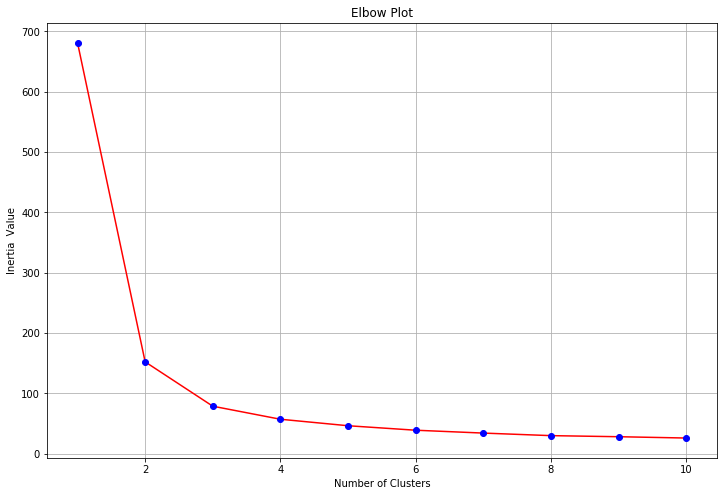

In [58]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),inertia,color='red',marker='o',markerfacecolor='blue',markeredgecolor='blue')
plt.grid()
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia  Value')
plt.show()

#### Elbow occurs at k=3. Inertia value does not decrease by significant value after k=3.
#### Choosing k=3 as a optimum value.

### Fitting K-means model for k=3.

In [59]:
kmeans3=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans3.fit(x)
pred=kmeans3.predict(x)

In [60]:
np.unique(pred,return_counts=True)

(array([0, 1, 2]), array([62, 50, 38], dtype=int64))

In [61]:
target=list(iris_raw.target_names)
target
col=['r','b','g']

### Visualizing cluster for first two columns of the dataset.

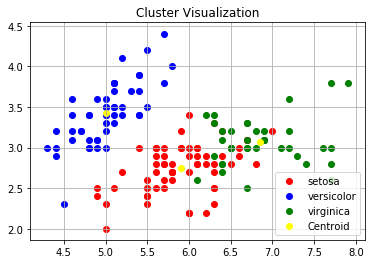

In [62]:
for i in range(0,3):
    plt.scatter(x[pred==i,0],x[pred==i,1],c=col[i],label=target[i])
plt.scatter(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1],color='yellow',label='Centroid')
plt.legend()
plt.title('Cluster Visualization')
plt.grid()
plt.show()

## THANKS.